In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

In [10]:
# Get mnist dataset
data = datasets.fetch_openml('mnist_784',version=1, return_X_y=True)

pixel_values, targets = data
targets = targets.astype(int)
pixel_values.shape, targets.shape

((70000, 784), (70000,))

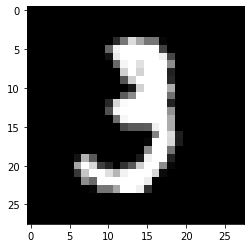

In [11]:
# Check one image
single_image = pixel_values[10,:].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [19]:
# Perform tsne decomposition
N = 5000 # Number of images
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:N,:])
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:N])), columns=['x','y','targets'])
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

In [20]:
tsne_df.head()

,x,y,targets
0,27.088566,-12.483382,5
1,4.760361,-76.225716,0
2,62.843925,15.778657,4
3,-41.706882,40.620762,1
4,26.070206,27.240562,9


C:\Users\tpha0061\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


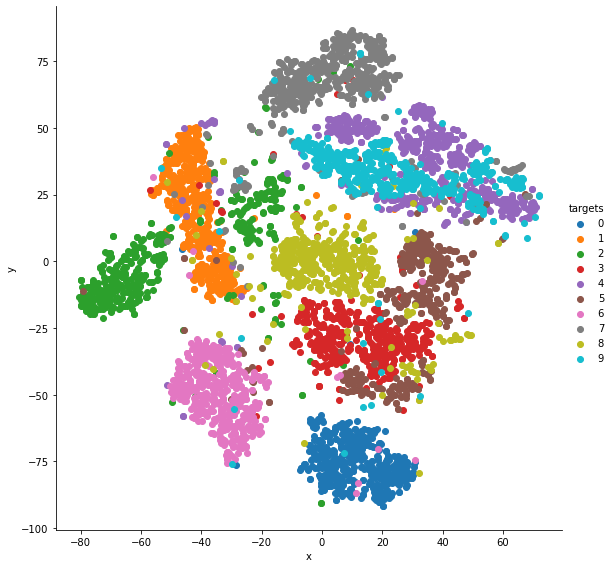

In [21]:
# Visualise tsne of mnist
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)
grid.map(plt.scatter,'x','y').add_legend()